In [1]:
from Utils import PlotUtlis, create_folder, mm2inch, set_mpl_defaults, get_significance_stars, get_performance_stats

import yaml
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
import math
import feather

set_mpl_defaults()

In [2]:
run_id = 'e52c8ac9a3e24c75ac871f63bbdea060'
exp_id = '115656750127464383'
niche_rst_size = 100

In [3]:
PU = PlotUtlis(run_id = run_id, exp_id = exp_id, niche_rst_size = niche_rst_size)

In [4]:
create_folder(PU.plot_path_nichespace)

# PCA with all env data

In [5]:
df_env = PU.set_df_env()

In [6]:
df_env_corr = pd.DataFrame(df_env, columns = PU.env_list).corr()
df_env_corr.to_csv(PU.df_env_corr_path, index = True)

df_env_corr

,clt,hurs,pr,rsds,sfcWind,tas,EVI,landcover_PC00,landcover_PC01,landcover_PC02,landcover_PC03,landcover_PC04
clt,1.000000,0.646469,0.500409,-0.226728,-0.095269,-0.090187,0.119220,-0.264780,0.053206,0.006893,0.000013,-0.019453
hurs,0.646469,1.000000,0.319188,-0.294080,-0.114281,-0.050017,0.171116,-0.311213,0.038529,-0.024504,-0.022161,-0.055479
pr,0.500409,0.319188,1.000000,0.089246,-0.087093,0.193416,0.207360,-0.142039,0.035729,-0.001112,0.001947,-0.021878
rsds,-0.226728,-0.294080,0.089246,1.000000,-0.168906,0.603617,0.284314,0.159116,-0.038368,-0.012133,-0.011207,0.000866
sfcWind,-0.095269,-0.114281,-0.087093,-0.168906,1.000000,-0.069114,-0.285519,0.262189,-0.074140,-0.025339,-0.078687,0.046396
tas,-0.090187,-0.050017,0.193416,0.603617,-0.069114,1.000000,0.239070,0.442452,-0.014851,0.024852,0.025770,0.026686
EVI,0.119220,0.171116,0.207360,0.284314,-0.285519,0.239070,1.000000,-0.378598,0.110976,-0.018808,-0.031638,-0.296646
landcover_PC00,-0.264780,-0.311213,-0.142039,0.159116,0.262189,0.442452,-0.378598,1.000000,0.011025,0.006705,0.033611,0.025964
landcover_PC01,0.053206,0.038529,0.035729,-0.038368,-0.074140,-0.014851,0.110976,0.011025,1.000000,-0.012799,-0.012977,-0.006009
landcover_PC02,0.006893,-0.024504,-0.001112,-0.012133,-0.025339,0.024852,-0.018808,0.006705,-0.012799,1.000000,0.032908,0.021983


### PCA

In [7]:
pca = PCA()
pca.fit(df_env)
df_pca = pca.transform(df_env)

### PCA explained ratio

In [8]:
csv_output = os.path.join(PU.plot_path_nichespace, 'explained_variance_ratio.csv')
pd.DataFrame(
    pca.explained_variance_ratio_, columns = ['ratio'], index = [f'PC{i+1:02d}' for i in range(len(df_env.columns))]
).to_csv(csv_output, index = True)

pca.explained_variance_ratio_

array([0.20262002, 0.1650405 , 0.11298901, 0.09268415, 0.08398669,
       0.08181461, 0.07816749, 0.05875113, 0.05068622, 0.03177642,
       0.02571561, 0.01576817])

### PCA loadings

In [9]:
df_loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), index = PU.env_list, columns = [f'PC{i+1:02d}' for i in range(len(PU.env_list))])
df_loadings.to_csv(PU.env_pca_loadings_path)
df_loadings

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,PC11,PC12
clt,0.791181,0.023251,0.412736,-0.027217,-0.003699,0.022716,0.030466,-0.078871,0.012862,-0.248977,-0.355124,-0.080331
hurs,0.779343,0.052390,0.277185,-0.066183,-0.014193,0.003071,0.057757,-0.229423,-0.392394,-0.032832,0.280744,0.136450
pr,0.543056,-0.354991,0.458484,-0.046981,-0.038296,-0.015114,-0.024241,0.255166,0.495091,0.184609,0.130929,0.054106
rsds,-0.320606,-0.802049,-0.018868,0.045139,-0.075221,-0.108039,-0.154037,0.109958,0.028925,-0.418182,0.066139,0.135275
sfcWind,-0.308097,0.381634,0.379110,-0.438542,-0.076328,0.108335,0.121962,0.577118,-0.225842,-0.079495,0.021079,-0.010790
tas,-0.263058,-0.792704,0.382155,-0.042480,0.000770,0.022278,0.021364,-0.105370,-0.221749,0.120644,0.059487,-0.274320
EVI,0.408395,-0.618180,-0.425350,-0.090017,-0.019069,0.038155,0.039376,0.263253,-0.267853,0.238918,-0.211774,0.125277
landcover_PC00,-0.653888,-0.115080,0.502022,-0.177774,0.148515,0.142231,0.230444,-0.303829,0.023530,0.118810,-0.158831,0.218991
landcover_PC01,0.118967,-0.067189,-0.084270,-0.027837,0.940454,0.266379,-0.047887,0.092385,0.013533,-0.064565,0.048509,-0.022633
landcover_PC02,-0.019021,-0.005245,0.055718,0.401756,-0.252087,0.864017,-0.148875,0.043699,-0.021679,-0.012136,0.011799,0.014034


### 儲存所有時間點每格的環境值及PCA降維後各軸數值

In [10]:
df_env_pca = PU.set_df_env_pca(pca)

Processing date: 2018-12-01

### 儲存各個物種各別的csv，包含兩個模型的預測值及實際出現點位

In [5]:
PU.set_df_species()

Processing: Abroscopus_albogularis
Processing: Accipiter_trivirgatus
Processing: Accipiter_virgatus
Processing: Acridotheres_cristatellus
Processing: Actinodura_morrisoniana
Processing: Aegithalos_concinnus
Processing: Alauda_gulgula
Processing: Alcippe_brunnea
Processing: Alcippe_morrisonia
Processing: Amaurornis_phoenicurus
Processing: Apus_nipalensis
Processing: Arborophila_crudigularis
Processing: Bambusicola_sonorivox
Processing: Brachypteryx_goodfellowi
Processing: Caprimulgus_affinis
Processing: Carpodacus_formosanus
Processing: Cecropis_striolata
Processing: Centropus_bengalensis
Processing: Chalcophaps_indica
Processing: Cinclus_pallasii
Processing: Cisticola_exilis
Processing: Cisticola_juncidis
Processing: Columba_pulchricollis
Processing: Coracina_macei
Processing: Corvus_macrorhynchos
Processing: Delichon_dasypus
Processing: Dendrocitta_formosae
Processing: Dendrocopos_leucotos
Processing: Dicaeum_ignipectus
Processing: Dicaeum_minullum
Processing: Dicrurus_aeneus
Processi

### 計算各種類型的資訊

In [4]:
df_env_pca = feather.read_dataframe(PU.df_env_pca_path)

In [5]:
pc_info, bin_info, extent_info = PU.set_pc_bin_extent_info(df_env_pca)

In [6]:
df_grid = PU.set_df_grid(df_env_pca, bin_info)
feather.write_dataframe(df_grid, PU.df_grid_path)

### 各個預測圖沒有平均至總和為1
- 如果有存下來可以直接讀取資訊

In [4]:
df_grid = feather.read_dataframe(PU.df_grid_path)

with open(PU.extent_info_path, 'r') as yaml_file:
    extent_info = yaml.load(yaml_file, Loader = yaml.FullLoader)
    
df_env_pca = feather.read_dataframe(PU.df_env_pca_path)

In [4]:
PU.create_species_nichespace()

In [9]:
df_spearman = PU.calculate_spearman(extent_info)

Synoicus_chinensisaebarica

/home/klok0126/DeepSDM/Utils.py:837: RuntimeWarning: invalid value encountered in scalar divide
  weighted_x = np.sum(values * x_flat) / np.sum(values)
/home/klok0126/DeepSDM/Utils.py:838: RuntimeWarning: invalid value encountered in scalar divide
  weighted_y = np.sum(values * y_flat) / np.sum(values)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/klok0126/DeepSDM/Utils.py:615: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(valid_coords, rowvar = False)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encounte

Turnix_sylvaticuslustesianum

/home/klok0126/DeepSDM/Utils.py:837: RuntimeWarning: invalid value encountered in scalar divide
  weighted_x = np.sum(values * x_flat) / np.sum(values)
/home/klok0126/DeepSDM/Utils.py:838: RuntimeWarning: invalid value encountered in scalar divide
  weighted_y = np.sum(values * y_flat) / np.sum(values)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/klok0126/DeepSDM/Utils.py:615: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(valid_coords, rowvar = False)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encounte

Zosterops_simplexpillus

### 計算niche相似度與共域次數的關聯

In [4]:
rho_cosine_deepsdm, p_cosine_deepsdm, rho_cosine_maxent, p_cosine_maxent = PU.calculate_rho_niche_coocccounts()

Preloading nichespace files...
Processing co-occurrence data...
rho of deepsdm: 0.7086817340018878, p-value: 0.0
rho of maxent: 0.5629972423746227, p-value: 0.0


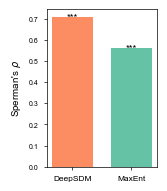

In [5]:
fig, ax = plt.subplots(figsize = mm2inch(40, 50), gridspec_kw = {'left': 0.25, 'right': 0.95, 
                                                               'bottom': 0.15, 'top': 0.95})
ax.bar(['DeepSDM', 'MaxEnt'], [rho_cosine_deepsdm, rho_cosine_maxent], color = ['#fc8d62', '#66c2a5'], width = 0.7)

ax.set_ylabel(rf"Sperman's $\rho$")
ax.text(0, rho_cosine_deepsdm, get_significance_stars(p_cosine_deepsdm), ha = 'center', va = 'center', size = 7)
ax.text(1, rho_cosine_maxent, get_significance_stars(p_cosine_maxent), ha = 'center', va = 'center', size = 7)
ax.tick_params('x', labelsize = 6)

plot_output = os.path.join(PU.plot_path_nichespace, 'rho_bar_cosine_similarity.pdf')
# plt.savefig(plot_output, dpi = 500, transparent = True)
plt.show()

### indicator comparison

In [4]:
indicator_merged = PU.merge_performance_indicator()

In [7]:
data_deepsdm, data_maxent, ticks, significance_stars, n, t_stats, p_values = get_performance_stats(indicator_merged)

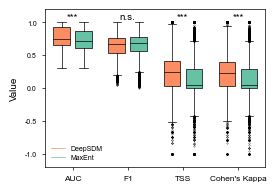

In [8]:
color_deepsdm = '#fc8d62'
color_maxent = '#66c2a5'

# 定義箱型圖顏色設置函數
def set_box_color(bp, fill_color):
    for patch in bp['boxes']:
        patch.set_edgecolor('black')
        patch.set_facecolor(fill_color)
    for whisker in bp['whiskers']:
        whisker.set_color('black')
    for cap in bp['caps']:
        cap.set_color('black')
    for median in bp['medians']:
        median.set_color('black')

positions_deepsdm = np.array(range(len(data_deepsdm))) * 2.0 - 0.4
positions_maxent = np.array(range(len(data_maxent))) * 2.0 + 0.4

fig, ax = plt.subplots(figsize=mm2inch(70, 50), gridspec_kw = {'left': 0.15, 'right': 0.95, 
                                                               'bottom': 0.15, 'top': 0.95})

bpl = ax.boxplot(data_deepsdm, positions=positions_deepsdm, sym='.', widths=0.6, patch_artist=True)
bpr = ax.boxplot(data_maxent, positions=positions_maxent, sym='.', widths=0.6, patch_artist=True)

set_box_color(bpl, color_deepsdm)
set_box_color(bpr, color_maxent)

for i, star in enumerate(significance_stars):
    x_pos = (positions_deepsdm[i] + positions_maxent[i]) / 2
    y_max = max(np.max(data_deepsdm[i]), np.max(data_maxent[i]))
    ax.text(x_pos, y_max + 0.02, star, ha='center', va='bottom', fontsize=7, color='black')

ax.plot([], c = color_deepsdm, label = 'DeepSDM')
ax.plot([], c = color_maxent, label = 'MaxEnt')
ax.legend(loc = 'lower left')
ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(ticks, fontsize = 6)
ax.set_xlim(-1, len(ticks) * 2 - 1)
ax.set_ylabel('Value')
ax.set_ylim(-1.2, 1.2)
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_yticklabels(np.arange(-1, 1.1, 0.5))
ax.grid(False)

plot_output = os.path.join(PU.plot_path_nichespace, 'indicator_boxplot_constantthreshold.pdf')
# plt.savefig(plot_output, dpi = 500, transparent = True)

plt.show()